## 로이터 데이터셋

1986년에 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합인 로이터 데이터셋을 사용하겠습니다. 이 데이터셋은 텍스트 분류를 위해 널리 사용되는 간단한 데이터셋입니다. 46개의 토픽이 있으며 어떤 토픽은 다른 것에 비해 데이터가 많습니다. 각 토픽은 훈련 세트에 최소한 10개의 샘플을 가지고 있습니다.


[과제] 로이터 데이터셋을 불러와서 아래 사항을 참조하여 다중 분류를 keras 신경망 모델을 이용하여 수행하세요.
 - 데이터 벡터화
 - 모델 구성 input_shape = 10000, 출력 layer 활성화 함수 = softmax
 - epochs 20으로 훈련 및 검증 결과를 시각화 후 과대적합이 시작되는 epochs를 
 확인하여 기술

In [1]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [2]:
print(train_data.shape, test_data.shape)

(8982,) (2246,)


In [3]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [4]:
import pandas as pd
pd.Series(train_labels).value_counts()

3     3159
4     1949
19     549
16     444
1      432
11     390
20     269
13     172
8      139
10     124
9      101
21     100
25      92
2       74
18      66
24      62
0       55
34      50
12      49
36      49
28      48
6       48
30      45
23      41
31      39
17      39
40      36
32      32
41      30
14      26
39      24
26      24
43      21
15      20
37      19
38      19
29      19
45      18
5       17
7       16
27      15
22      15
42      13
44      12
33      11
35      10
dtype: int64

In [5]:
# 로이터 데이터셋을 텍스트로 디코딩하기
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i -3,'?') for i in train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [6]:
train_labels[10]

3

In [7]:
# 데이터 인코딩
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels),dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [9]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [10]:
# 모델 정의하기
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu',))
model.add(layers.Dense(46,activation='softmax'))

In [11]:
# 마지막 Dense층의 크기가 46개임( 각 입력 샘플에 대해서 46차원의 벡터를 출력한다는 의미)
# softmax 활성화 함수를 사용(각 입력 샘플마다 46개의 출력 클래스에 대한 확률 분포를 출력)

In [12]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# categorical_crossentropy : 두 확률 분포사이의 거리를 측정(네트워크가 출력한 확률 분포와 진짜 레이블의 분포사이의 거리)

In [14]:
# 훈련검증

In [15]:
# 훈련 데이터에서 1000개의 샘플을 따로 떼어서 검증세트로 사용
from keras.backend import one_hot
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


In [16]:
# 20번의 에포크로 모델을 훈련시킴
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 64ms/step - loss: 2.4776 - accuracy: 0.5217 - val_loss: 1.6672 - val_accuracy: 0.6370
Epoch 2/20
16/16 [==============================] - 1s 49ms/step - loss: 1.3898 - accuracy: 0.7037 - val_loss: 1.2985 - val_accuracy: 0.7210
Epoch 3/20
16/16 [==============================] - 1s 48ms/step - loss: 1.0468 - accuracy: 0.7744 - val_loss: 1.1474 - val_accuracy: 0.7570
Epoch 4/20
16/16 [==============================] - 1s 48ms/step - loss: 0.8220 - accuracy: 0.8234 - val_loss: 1.0314 - val_accuracy: 0.7810
Epoch 5/20
16/16 [==============================] - 1s 49ms/step - loss: 0.6507 - accuracy: 0.8597 - val_loss: 0.9784 - val_accuracy: 0.7990
Epoch 6/20
16/16 [==============================] - 1s 47ms/step - loss: 0.5211 - accuracy: 0.8908 - val_loss: 0.9471 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 1s 71ms/step - loss: 0.4152 - accuracy: 0.9137 - val_loss: 0.9392 - val_accuracy: 0.8000
Epoch 8/20
16

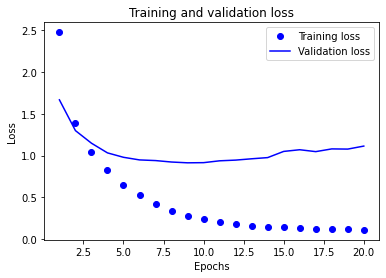

In [17]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

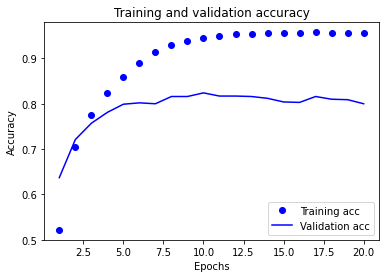

In [18]:
plt.clf()   # 그래프를 초기화합니다

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [19]:
# 아홉번째 에포크 이후에 과대적합이 시작 => 아홉번의 에포크로 새로운 모델을 훈련하고 테스트 세트에서 평가함.

In [20]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss ='categorical_crossentropy',
              metrics =['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
resluts = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 59ms/step - loss: 2.6814 - accuracy: 0.5214 - val_loss: 1.8197 - val_accuracy: 0.6360
Epoch 2/9
16/16 [==============================] - 1s 48ms/step - loss: 1.4837 - accuracy: 0.6932 - val_loss: 1.3651 - val_accuracy: 0.6910
Epoch 3/9
16/16 [==============================] - 1s 48ms/step - loss: 1.0903 - accuracy: 0.7577 - val_loss: 1.1759 - val_accuracy: 0.7340
Epoch 4/9
16/16 [==============================] - 1s 49ms/step - loss: 0.8492 - accuracy: 0.8156 - val_loss: 1.0505 - val_accuracy: 0.7610
Epoch 5/9
16/16 [==============================] - 1s 49ms/step - loss: 0.6706 - accuracy: 0.8613 - val_loss: 0.9730 - val_accuracy: 0.8010
Epoch 6/9
16/16 [==============================] - 1s 48ms/step - loss: 0.5299 - accuracy: 0.8943 - val_loss: 0.9140 - val_accuracy: 0.8190
Epoch 7/9
16/16 [==============================] - 1s 48ms/step - loss: 0.4236 - accuracy: 0.9166 - val_loss: 0.9075 - val_accuracy: 0.8110
Epoch 8/9
16/16 [===

In [21]:
# 새로운 데이터에 대해 예측하기
#predict 메서드: 46개의 토픽에 대한 확률 분포를 반환.

In [22]:
# 새로운 데이터에 대해 예측하기
predictions = model.predict(x_test)

In [23]:
predictions[0].shape

(46,)

In [24]:
# 레이블을 인코딩하는 방법은 정수 텐서로 변환하는것

In [25]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [26]:
# 손실함수 categorical_crossentropy(레이블이 범주형 인코딩되어있음) 을 sparse_categorical_crossentropy를 사용

In [27]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [28]:
# 마지막 출력이 46차원이기 때문에 중간층의 히든 유닛이 46개보다 많이 적어서는 안됨.(정보의 병목현상이 일어날 수 있음.)

In [29]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val,y_val))

Epoch 1/20
63/63 [==============================] - 2s 22ms/step - loss: 2.8927 - accuracy: 0.3519 - val_loss: 2.1819 - val_accuracy: 0.4230
Epoch 2/20
63/63 [==============================] - 1s 18ms/step - loss: 1.8153 - accuracy: 0.5649 - val_loss: 1.6380 - val_accuracy: 0.5990
Epoch 3/20
63/63 [==============================] - 1s 18ms/step - loss: 1.4714 - accuracy: 0.6189 - val_loss: 1.5141 - val_accuracy: 0.6100
Epoch 4/20
63/63 [==============================] - 1s 19ms/step - loss: 1.3163 - accuracy: 0.6481 - val_loss: 1.4483 - val_accuracy: 0.6380
Epoch 5/20
63/63 [==============================] - 1s 18ms/step - loss: 1.1839 - accuracy: 0.6853 - val_loss: 1.4127 - val_accuracy: 0.6490
Epoch 6/20
63/63 [==============================] - 1s 18ms/step - loss: 1.0606 - accuracy: 0.7223 - val_loss: 1.3505 - val_accuracy: 0.6900
Epoch 7/20
63/63 [==============================] - 1s 19ms/step - loss: 0.9531 - accuracy: 0.7620 - val_loss: 1.3464 - val_accuracy: 0.7030
Epoch 8/20
63

추가 과제
  - 유닛의 수를 32개, 128개로 조정해서 수행
  - 은닉 층을 1개, 3개로 변경하면서 수행

In [ ]:
# 유닛의 수 32개

In [32]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val,y_val))

Epoch 1/20
63/63 [==============================] - 1s 16ms/step - loss: 3.0239 - accuracy: 0.3715 - val_loss: 2.2576 - val_accuracy: 0.6060
Epoch 2/20
63/63 [==============================] - 1s 13ms/step - loss: 1.8431 - accuracy: 0.6468 - val_loss: 1.5699 - val_accuracy: 0.6520
Epoch 3/20
63/63 [==============================] - 1s 13ms/step - loss: 1.3879 - accuracy: 0.6743 - val_loss: 1.3950 - val_accuracy: 0.6640
Epoch 4/20
63/63 [==============================] - 1s 13ms/step - loss: 1.2083 - accuracy: 0.6880 - val_loss: 1.3216 - val_accuracy: 0.6640
Epoch 5/20
63/63 [==============================] - 1s 13ms/step - loss: 1.0934 - accuracy: 0.7181 - val_loss: 1.2871 - val_accuracy: 0.6810
Epoch 6/20
63/63 [==============================] - 1s 14ms/step - loss: 1.0021 - accuracy: 0.7464 - val_loss: 1.2681 - val_accuracy: 0.6970
Epoch 7/20
63/63 [==============================] - 1s 14ms/step - loss: 0.9264 - accuracy: 0.7617 - val_loss: 1.2535 - val_accuracy: 0.7030
Epoch 8/20
63

유닛수 128개

In [33]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val,y_val))

Epoch 1/20
63/63 [==============================] - 2s 31ms/step - loss: 2.6416 - accuracy: 0.3229 - val_loss: 1.9204 - val_accuracy: 0.5810
Epoch 2/20
63/63 [==============================] - 2s 27ms/step - loss: 1.5572 - accuracy: 0.6070 - val_loss: 1.5120 - val_accuracy: 0.6290
Epoch 3/20
63/63 [==============================] - 2s 28ms/step - loss: 1.2177 - accuracy: 0.7098 - val_loss: 1.4039 - val_accuracy: 0.6760
Epoch 4/20
63/63 [==============================] - 2s 28ms/step - loss: 1.0367 - accuracy: 0.7467 - val_loss: 1.3436 - val_accuracy: 0.6970
Epoch 5/20
63/63 [==============================] - 2s 27ms/step - loss: 0.9161 - accuracy: 0.7705 - val_loss: 1.3619 - val_accuracy: 0.6950
Epoch 6/20
63/63 [==============================] - 2s 28ms/step - loss: 0.8230 - accuracy: 0.7907 - val_loss: 1.4139 - val_accuracy: 0.7010
Epoch 7/20
63/63 [==============================] - 2s 28ms/step - loss: 0.7498 - accuracy: 0.8084 - val_loss: 1.4361 - val_accuracy: 0.7090
Epoch 8/20
63

은닉 층을 1개

In [34]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val,y_val))

Epoch 1/20
63/63 [==============================] - 2s 22ms/step - loss: 1.8113 - accuracy: 0.6594 - val_loss: 1.2263 - val_accuracy: 0.7370
Epoch 2/20
63/63 [==============================] - 1s 18ms/step - loss: 0.9411 - accuracy: 0.8014 - val_loss: 0.9934 - val_accuracy: 0.7900
Epoch 3/20
63/63 [==============================] - 1s 17ms/step - loss: 0.6458 - accuracy: 0.8636 - val_loss: 0.8790 - val_accuracy: 0.8210
Epoch 4/20
63/63 [==============================] - 1s 18ms/step - loss: 0.4577 - accuracy: 0.9040 - val_loss: 0.8363 - val_accuracy: 0.8240
Epoch 5/20
63/63 [==============================] - 1s 17ms/step - loss: 0.3410 - accuracy: 0.9278 - val_loss: 0.8136 - val_accuracy: 0.8330
Epoch 6/20
63/63 [==============================] - 1s 18ms/step - loss: 0.2657 - accuracy: 0.9391 - val_loss: 0.8322 - val_accuracy: 0.8210
Epoch 7/20
63/63 [==============================] - 1s 17ms/step - loss: 0.2166 - accuracy: 0.9460 - val_loss: 0.8320 - val_accuracy: 0.8340
Epoch 8/20
63

은닉층을 3개

In [35]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val,y_val))

Epoch 1/20
63/63 [==============================] - 2s 20ms/step - loss: 1.8528 - accuracy: 0.5952 - val_loss: 1.2394 - val_accuracy: 0.7120
Epoch 2/20
63/63 [==============================] - 1s 17ms/step - loss: 0.9962 - accuracy: 0.7670 - val_loss: 1.0601 - val_accuracy: 0.7570
Epoch 3/20
63/63 [==============================] - 1s 18ms/step - loss: 0.6763 - accuracy: 0.8497 - val_loss: 1.0092 - val_accuracy: 0.7720
Epoch 4/20
63/63 [==============================] - 1s 18ms/step - loss: 0.4719 - accuracy: 0.8955 - val_loss: 0.9485 - val_accuracy: 0.8060
Epoch 5/20
63/63 [==============================] - 1s 18ms/step - loss: 0.3296 - accuracy: 0.9271 - val_loss: 1.0716 - val_accuracy: 0.7890
Epoch 6/20
63/63 [==============================] - 1s 17ms/step - loss: 0.2556 - accuracy: 0.9402 - val_loss: 1.0024 - val_accuracy: 0.8020
Epoch 7/20
63/63 [==============================] - 1s 17ms/step - loss: 0.2114 - accuracy: 0.9495 - val_loss: 1.0317 - val_accuracy: 0.8130
Epoch 8/20
63